**Unsupervised Learning**

We shall be trying to learn the different Unsupervised Learning techniques with the help of a data set *'Wholesale Customers Data.csv'* that we have downloaded from Kaggle

1.   K-Means Clustering
2.   Agglomerative Hierarchial Clustering (AHC)
3.   Principal Component Analysis

**Process:** We first do the essential Pre-processing steps to make the model more accurate. Next we will be deploying the different models and trying to figure out relation between the features in the dataset




In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [166]:
# Wholesale customer dataset
data = pd.read_csv('/content/Wholesale customers data.csv')
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [167]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [168]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Since there are no missing values (nan) in dataset, we don't have to do missing value imputation


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [170]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Next is handling Outliers in dataset

In [171]:
# Outliers

print('Types of elements in Channel: ', data['Channel'].unique())
print('Types of elements in Region: ', data['Region'].unique())

Types of elements in Channel:  [2 1]
Types of elements in Region:  [3 1 2]


Text(0.5, 1.0, 'Delicassen')

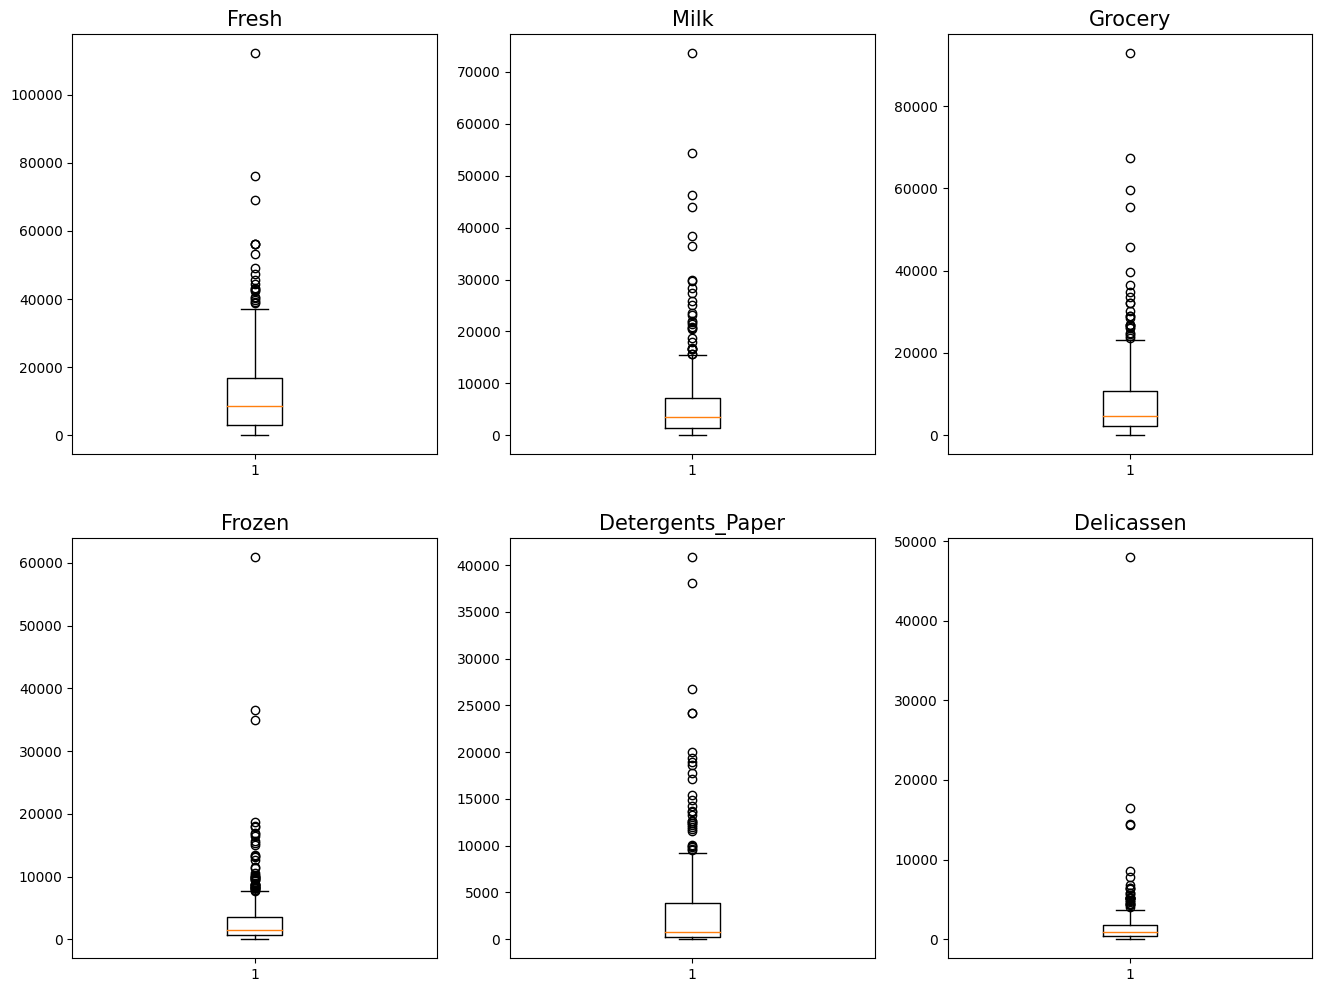

In [172]:
# Since 'Channel' and 'Region' don't have any outliers, we only have to consider the other 6 columns

plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.boxplot(data['Fresh'])
plt.title('Fresh', fontsize = 15)

plt.subplot(2,3,2)
plt.boxplot(data['Milk'])
plt.title('Milk', fontsize = 15)

plt.subplot(2,3,3)
plt.boxplot(data['Grocery'])
plt.title('Grocery', fontsize = 15)

plt.subplot(2,3,4)
plt.boxplot(data['Frozen'])
plt.title('Frozen', fontsize = 15)

plt.subplot(2,3,5)
plt.boxplot(data['Detergents_Paper'])
plt.title('Detergents_Paper', fontsize = 15)

plt.subplot(2,3,6)
plt.boxplot(data['Delicassen'])
plt.title('Delicassen', fontsize = 15)


In [173]:
# Since all 6 columns have outliers, we shall be using IQR method to cap the values

In [174]:
# Fresh

In [175]:
Q1 = data['Fresh'].quantile(0.25)
Q2 = data['Fresh'].quantile(0.50)
Q3 = data['Fresh'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-17581.25 37642.75


In [176]:
data['Fresh'] = np.where(data['Fresh'] >= high, high, np.where(data['Fresh'] <= low, low, data['Fresh']))

In [177]:
# Milk

In [178]:
Q1 = data['Milk'].quantile(0.25)
Q2 = data['Milk'].quantile(0.50)
Q3 = data['Milk'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-6952.875 15676.125


In [179]:
data['Milk'] = np.where(data['Milk'] >= high, high, np.where(data['Milk'] <= low, low, data['Milk']))

In [180]:
# Grocery

In [181]:
Q1 = data['Grocery'].quantile(0.25)
Q2 = data['Grocery'].quantile(0.50)
Q3 = data['Grocery'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-10601.125 23409.875


In [182]:
data['Grocery'] = np.where(data['Grocery'] >= high, high, np.where(data['Grocery'] <= low, low, data['Grocery']))

In [183]:
# Frozen

In [184]:
Q1 = data['Frozen'].quantile(0.25)
Q2 = data['Frozen'].quantile(0.50)
Q3 = data['Frozen'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-3475.75 7772.25


In [185]:
data['Frozen'] = np.where(data['Frozen'] >= high, high, np.where(data['Frozen'] <= low, low, data['Frozen']))

In [186]:
# Detergents_Paper

In [187]:
Q1 = data['Detergents_Paper'].quantile(0.25)
Q2 = data['Detergents_Paper'].quantile(0.50)
Q3 = data['Detergents_Paper'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-5241.125 9419.875


In [188]:
data['Detergents_Paper'] = np.where(data['Detergents_Paper'] >= high, high, np.where(data['Detergents_Paper'] <= low, low, data['Detergents_Paper']))

In [189]:
# Delicassen

In [190]:
Q1 = data['Delicassen'].quantile(0.25)
Q2 = data['Delicassen'].quantile(0.50)
Q3 = data['Delicassen'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-1709.75 3938.25


In [191]:
data['Delicassen'] = np.where(data['Delicassen'] >= high, high, np.where(data['Delicassen'] <= low, low, data['Delicassen']))

In [192]:
# Plotting the dataset after removal of outliers

Text(0.5, 1.0, 'Delicassen')

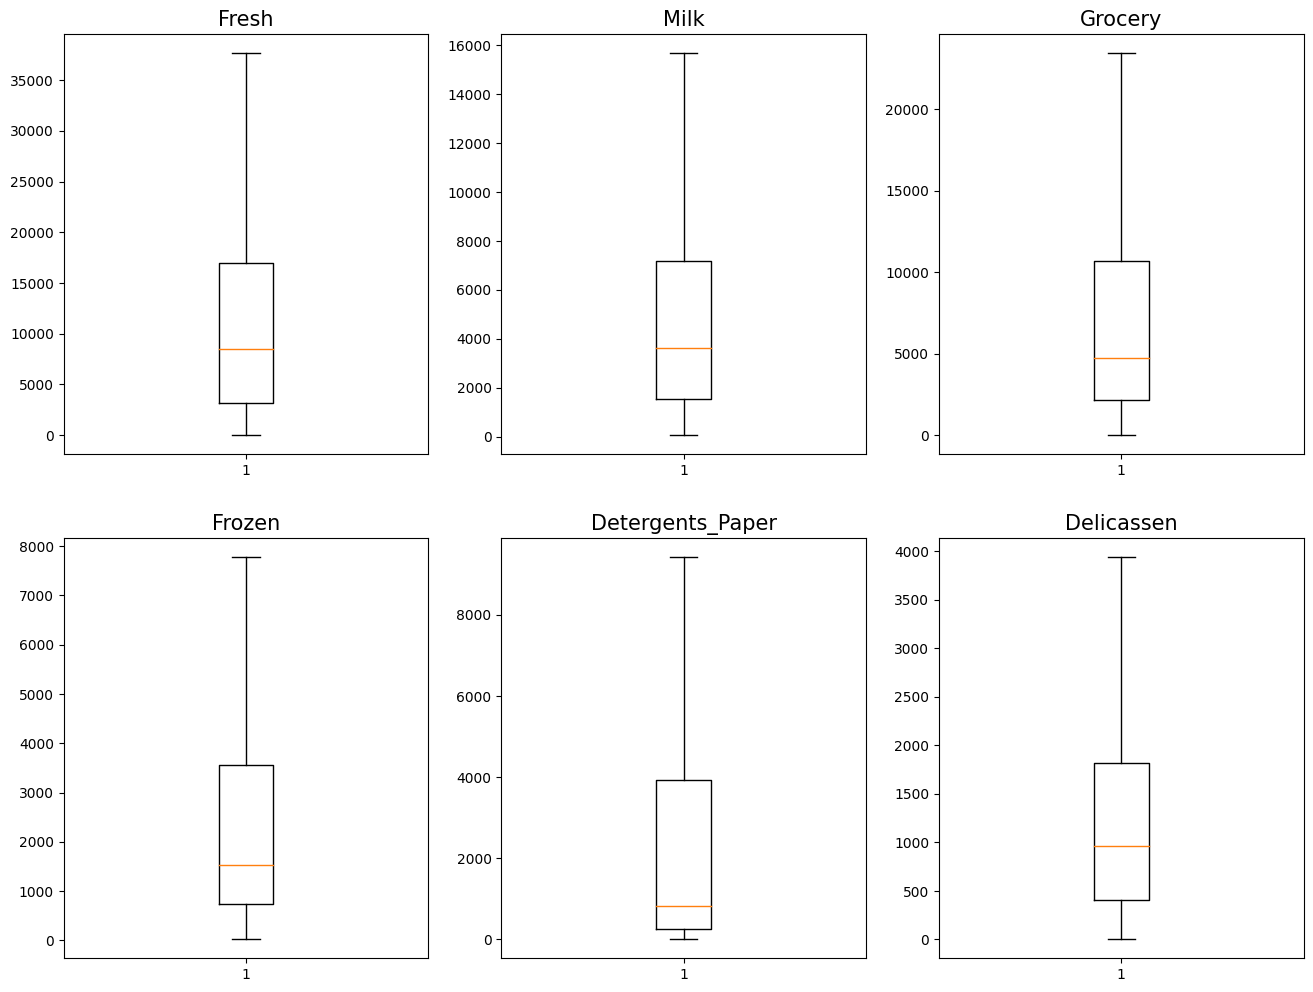

In [193]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
plt.boxplot(data['Fresh'])
plt.title('Fresh', fontsize = 15)

plt.subplot(2,3,2)
plt.boxplot(data['Milk'])
plt.title('Milk', fontsize = 15)

plt.subplot(2,3,3)
plt.boxplot(data['Grocery'])
plt.title('Grocery', fontsize = 15)

plt.subplot(2,3,4)
plt.boxplot(data['Frozen'])
plt.title('Frozen', fontsize = 15)

plt.subplot(2,3,5)
plt.boxplot(data['Detergents_Paper'])
plt.title('Detergents_Paper', fontsize = 15)

plt.subplot(2,3,6)
plt.boxplot(data['Delicassen'])
plt.title('Delicassen', fontsize = 15)

In [194]:
# Encoding

# There is no need to perform encoding as all the columns are already numerical value columns

In [195]:
# Scaling
# Feature scaling only in independent features and non-target columns. But in our case there is no target column
# Since 'Channel', 'Region' don't have much variation in values, they don't need to be scaled.
# We only scale the 6 columns - 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'

In [196]:
X = data.copy()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [197]:
x = data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']]

x.loc[:,['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']] = sc.fit_transform(x[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']])

In [198]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,2,3,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,2,3,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,1,3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,2,3,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


K-Means Clustering

In [199]:
from sklearn.cluster import KMeans

In [200]:
# Finding the optimal number of clusters for our dataset
wcss=[]
for i in range(1,11):
  km = KMeans(n_clusters = i,n_init = 10, init='k-means++')
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

In [201]:
wcss

[2999.352272727272,
 2033.6070521205424,
 1665.249329994348,
 1490.1103204515134,
 1343.8241400795662,
 1222.7578875641052,
 1115.4000331537009,
 1031.0353445724108,
 965.1003678650218,
 921.6044551669481]

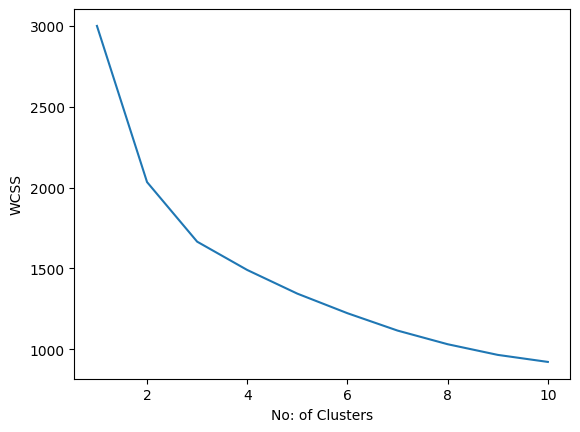

In [202]:
plt.plot(range(1,11), wcss)
plt.xlabel('No: of Clusters')
plt.ylabel('WCSS')
plt.show()

In [203]:
# From elbow method, 3 is the optimum number of clusters for our dataset



In [204]:
km = KMeans(n_clusters=3, n_init = 10)

In [205]:
km.fit(x)

KMeans(n_clusters=3, n_init=10)

In [206]:
y_km = km.predict(x)
y_km

array([0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,

In [207]:
pd.Series(y_km).value_counts()

2    231
0    112
1     97
dtype: int64

In [208]:
x.head() # Checking all the features between which scatter plot needs to be plotted

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,2,3,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,2,3,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,1,3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,2,3,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


In [209]:
# We shall plot scatter plots between 'Channel' and 'Fresh','Milk','Grocry','Frozen','Detergents_Paper','Delicassen'
# & between 'Region' and 'Fresh','Milk','Grocry','Frozen','Detergents_Paper','Delicassen'


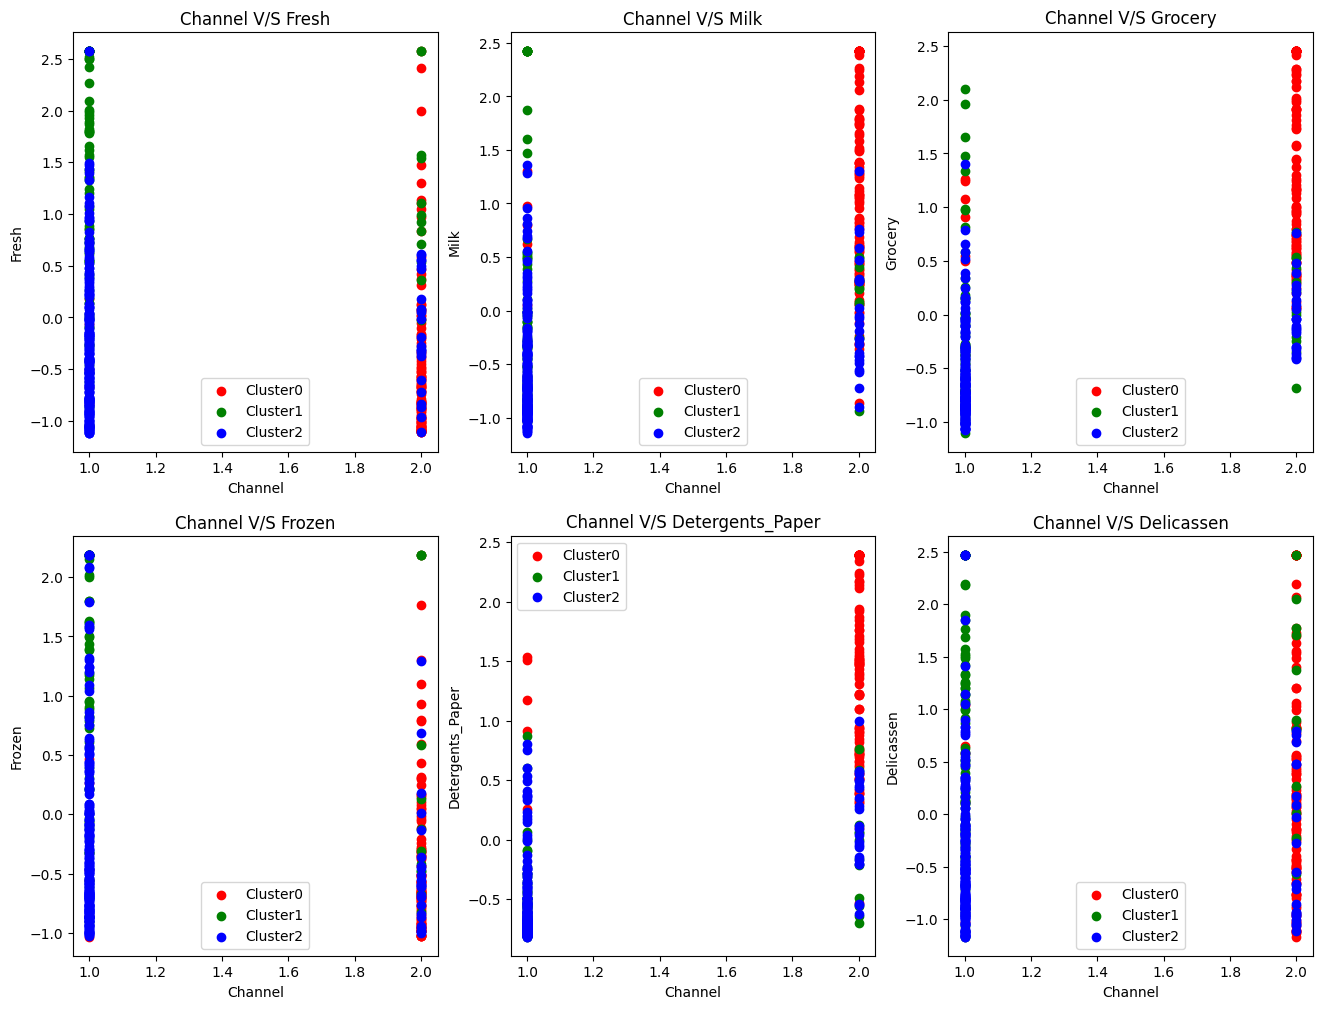

In [210]:
# Channel V/S Fresh
colors = ['r', 'g', 'b']
plt.figure(figsize=(16,12))
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,1)
  plt.scatter(cluster_data['Channel'], cluster_data['Fresh'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Fresh')
plt.title('Channel V/S Fresh')
plt.legend()

# Channel V/S Milk
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,2)
  plt.scatter(cluster_data['Channel'], cluster_data['Milk'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Milk')
plt.title('Channel V/S Milk')
plt.legend()

# Channel V/S Grocery
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,3)
  plt.scatter(cluster_data['Channel'], cluster_data['Grocery'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Grocery')
plt.title('Channel V/S Grocery')
plt.legend()

# Channel V/S Frozen
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,4)
  plt.scatter(cluster_data['Channel'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Frozen')
plt.title('Channel V/S Frozen')
plt.legend()

# Channel V/S Detergents_Paper
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,5)
  plt.scatter(cluster_data['Channel'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Detergents_Paper')
plt.title('Channel V/S Detergents_Paper')
plt.legend()

# Channel V/S Delicassen
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,6)
  plt.scatter(cluster_data['Channel'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Delicassen')
plt.title('Channel V/S Delicassen')
plt.legend()

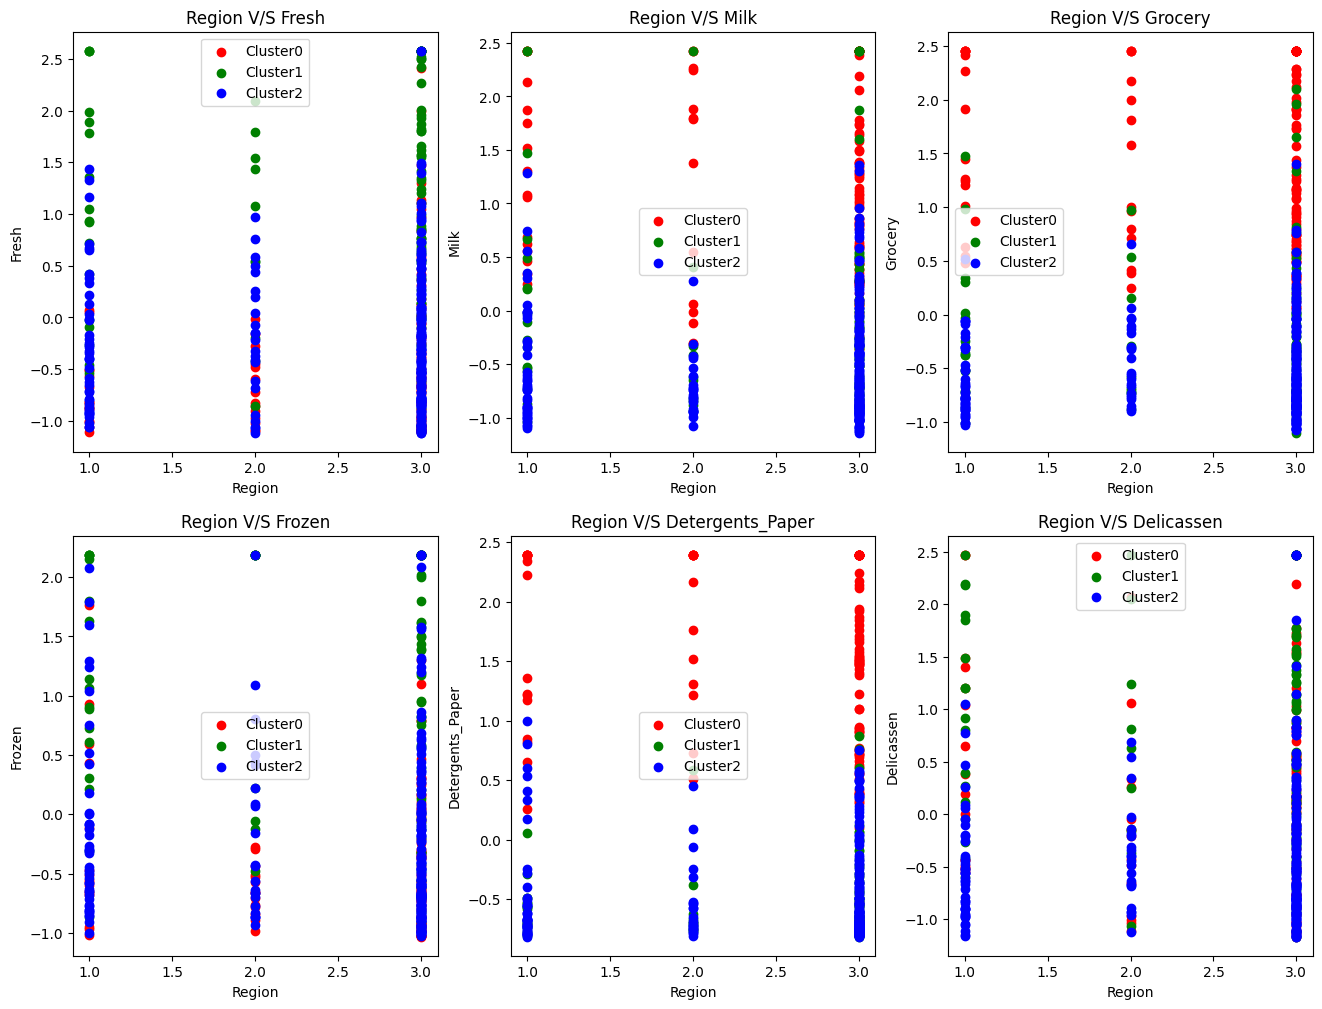

In [211]:
# Now we shall try understanding the relationship b/w region and other features
# Region V/S Fresh
colors = ['r', 'g', 'b']
plt.figure(figsize=(16,12))
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,1)
  plt.scatter(cluster_data['Region'], cluster_data['Fresh'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Fresh')
plt.title('Region V/S Fresh')
plt.legend()

# Region V/S Milk
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,2)
  plt.scatter(cluster_data['Region'], cluster_data['Milk'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Milk')
plt.title('Region V/S Milk')
plt.legend()

# Region V/S Grocery
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,3)
  plt.scatter(cluster_data['Region'], cluster_data['Grocery'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region V/S Grocery')
plt.legend()

# Region V/S Frozen
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,4)
  plt.scatter(cluster_data['Region'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Frozen')
plt.title('Region V/S Frozen')
plt.legend()

# Region V/S Detergents_Paper
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,5)
  plt.scatter(cluster_data['Region'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Detergents_Paper')
plt.title('Region V/S Detergents_Paper')
plt.legend()

# Region V/S Delicassen
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(2,3,6)
  plt.scatter(cluster_data['Region'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Delicassen')
plt.title('Region V/S Delicassen')
plt.legend()

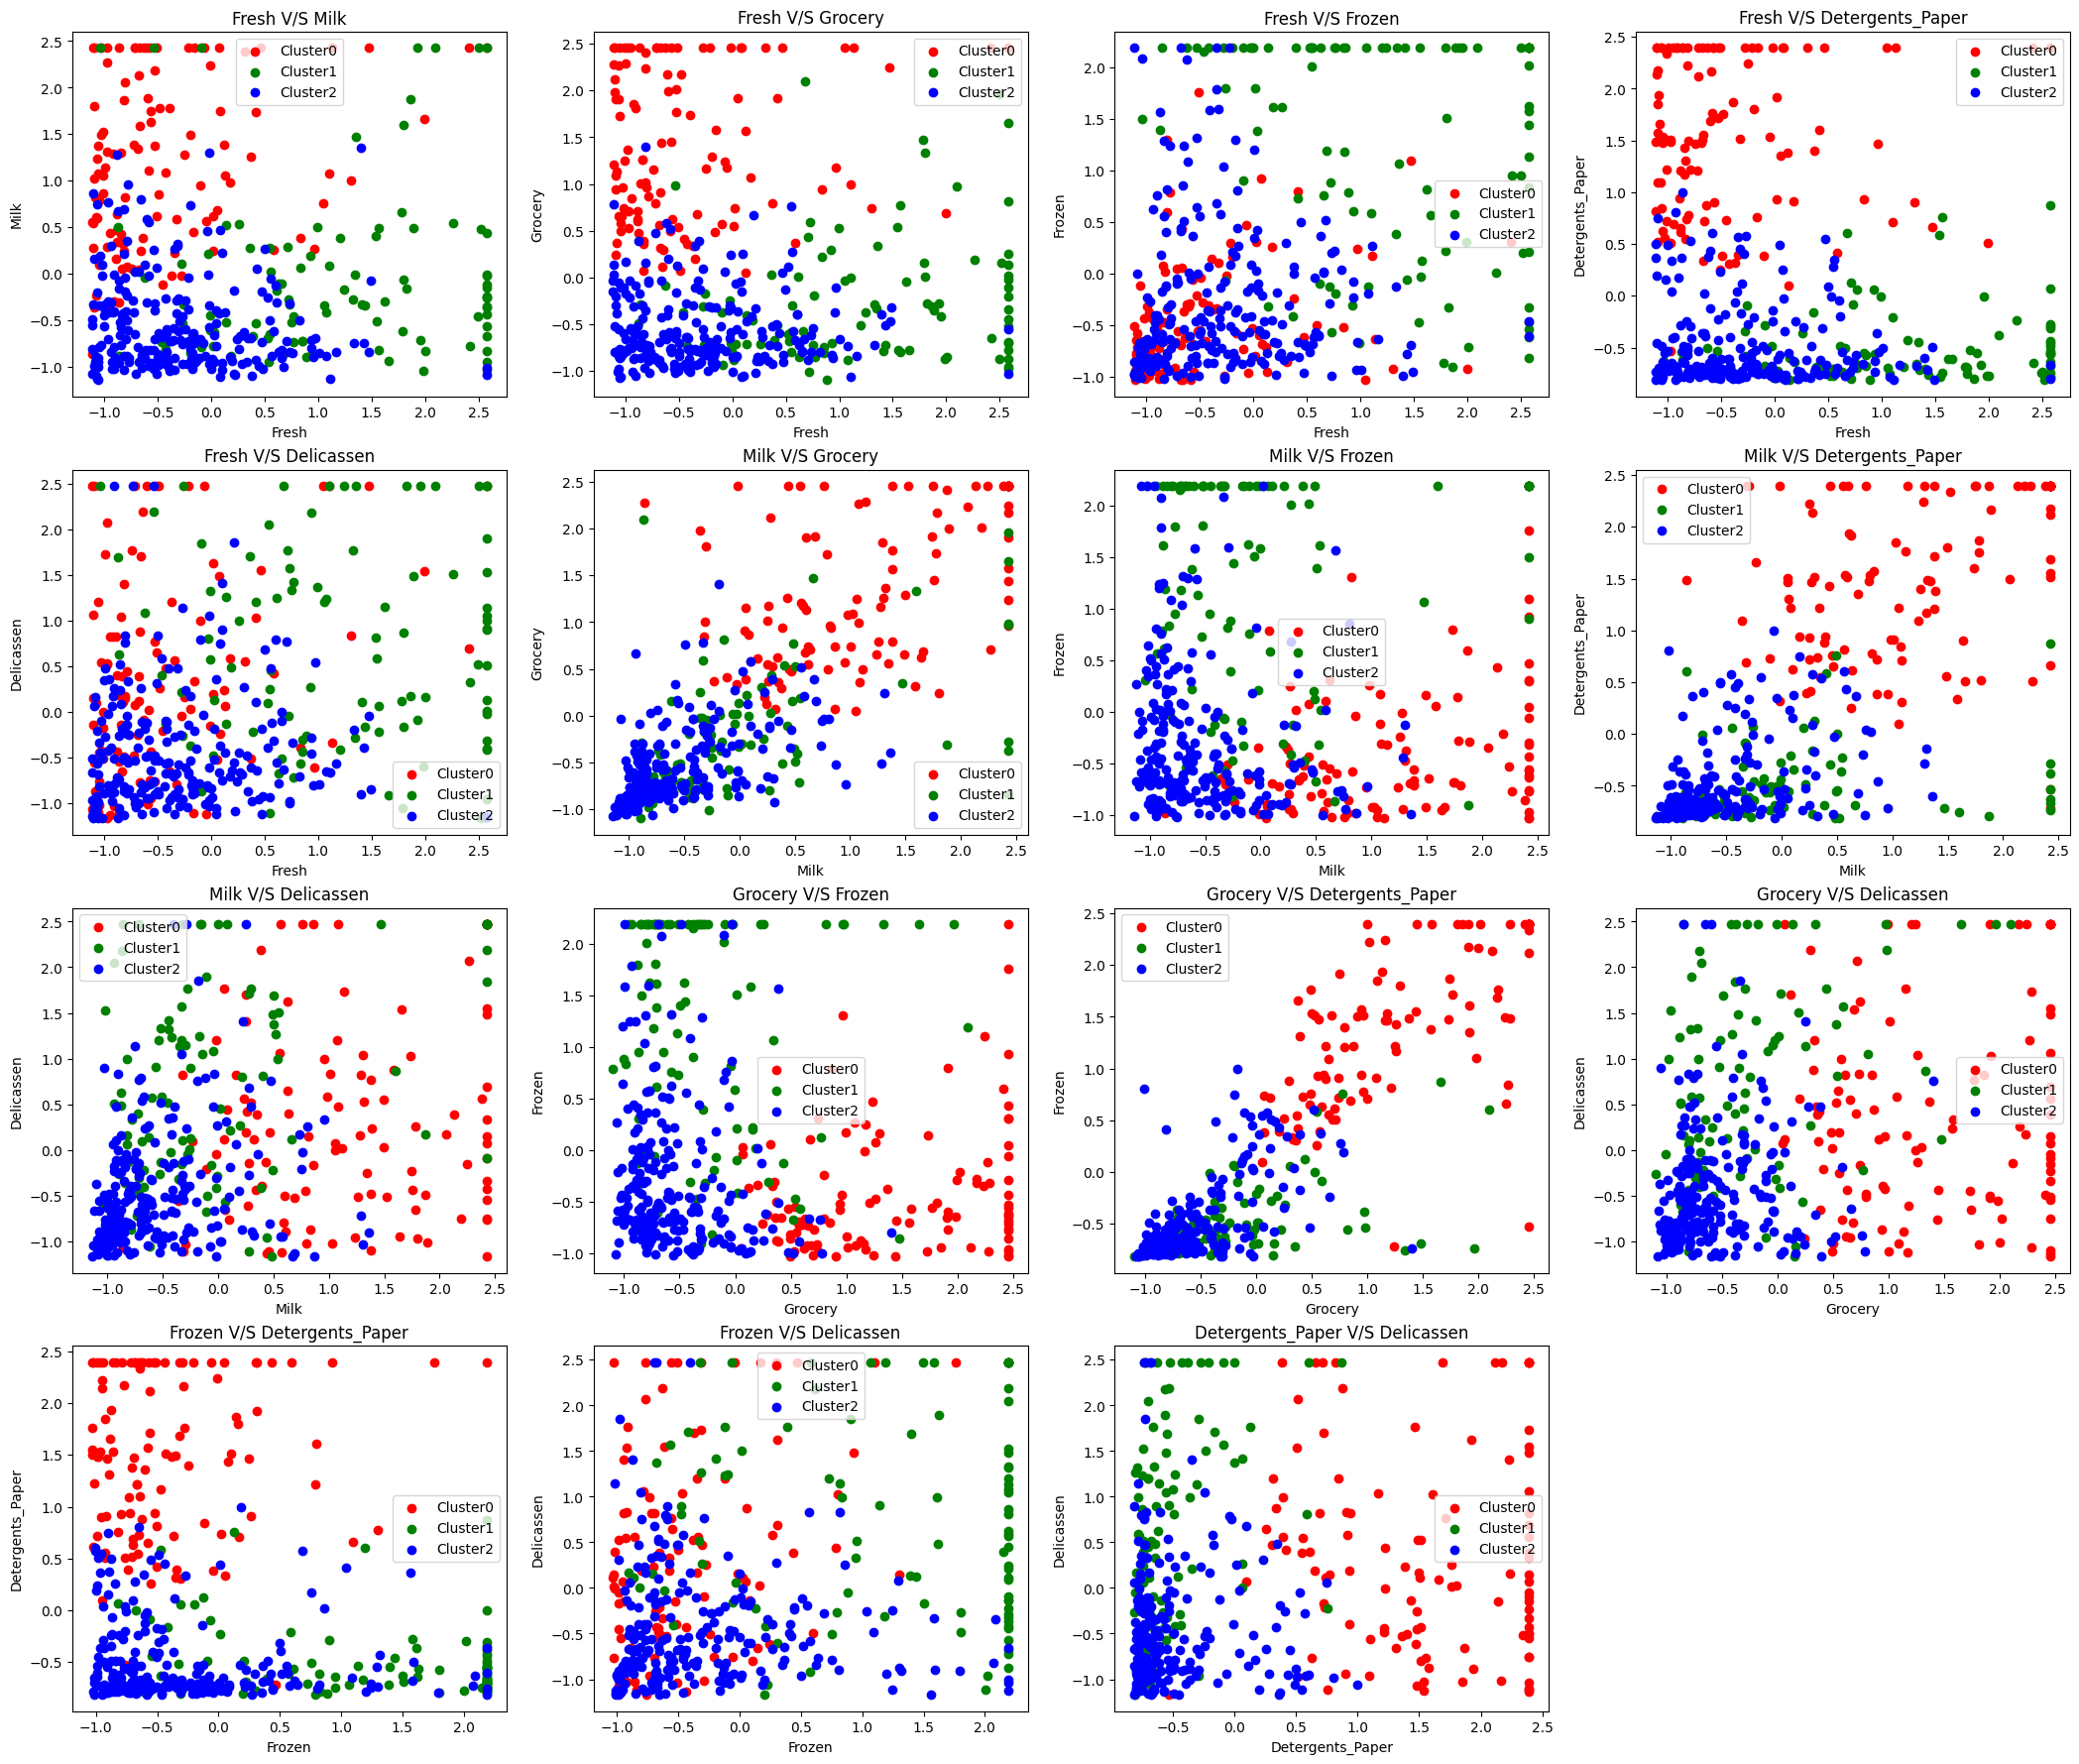

In [212]:
# We will try to understand relation between all other features now
# Fresh V/S Milk
colors = ['r', 'g', 'b']
plt.figure(figsize=(26,22))
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,1)
  plt.scatter(cluster_data['Fresh'], cluster_data['Milk'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Fresh V/S Milk')
plt.legend()

# Fresh V/S Grocery
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,2)
  plt.scatter(cluster_data['Fresh'], cluster_data['Grocery'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Fresh V/S Grocery')
plt.legend()

# Fresh V/S Frozen
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,3)
  plt.scatter(cluster_data['Fresh'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh V/S Frozen')
plt.legend()

# Fresh V/S Detergents_Paper
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,4)
  plt.scatter(cluster_data['Fresh'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.title('Fresh V/S Detergents_Paper')
plt.legend()

# Fresh V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,5)
  plt.scatter(cluster_data['Fresh'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Delicassen')
plt.title('Fresh V/S Delicassen')
plt.legend()

# Milk V/S Grocery
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,6)
  plt.scatter(cluster_data['Milk'], cluster_data['Grocery'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Milk V/S Grocery')
plt.legend()

# Milk V/S Frozen
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,7)
  plt.scatter(cluster_data['Milk'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Frozen')
plt.title('Milk V/S Frozen')
plt.legend()

# Milk V/S Detergents_Paper
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,8)
  plt.scatter(cluster_data['Milk'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')
plt.title('Milk V/S Detergents_Paper')
plt.legend()

# Milk V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,9)
  plt.scatter(cluster_data['Milk'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Delicassen')
plt.title('Milk V/S Delicassen')
plt.legend()

# Grocery V/S Frozen
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,10)
  plt.scatter(cluster_data['Grocery'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Grocery V/S Frozen')
plt.legend()

# Grocery V/S Detergents_Paper
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,11)
  plt.scatter(cluster_data['Grocery'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Grocery V/S Detergents_Paper')
plt.legend()

# Grocery V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,12)
  plt.scatter(cluster_data['Grocery'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Grocery')
plt.ylabel('Delicassen')
plt.title('Grocery V/S Delicassen')
plt.legend()

# Frozen V/S Detergents_Paper
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,13)
  plt.scatter(cluster_data['Frozen'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Frozen')
plt.ylabel('Detergents_Paper')
plt.title('Frozen V/S Detergents_Paper')
plt.legend()

# Frozen V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,14)
  plt.scatter(cluster_data['Frozen'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.title('Frozen V/S Delicassen')
plt.legend()

# Detergents_Paper V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_km) + 1):
  cluster_data = x[y_km==i]
  plt.subplot(4,4,15)
  plt.scatter(cluster_data['Detergents_Paper'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title('Detergents_Paper V/S Delicassen')
plt.legend()



Agglomerative Hierarchial Clustering

In [213]:
# First we need to create dendrogram

In [214]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [215]:
merging = linkage(x, method='ward')

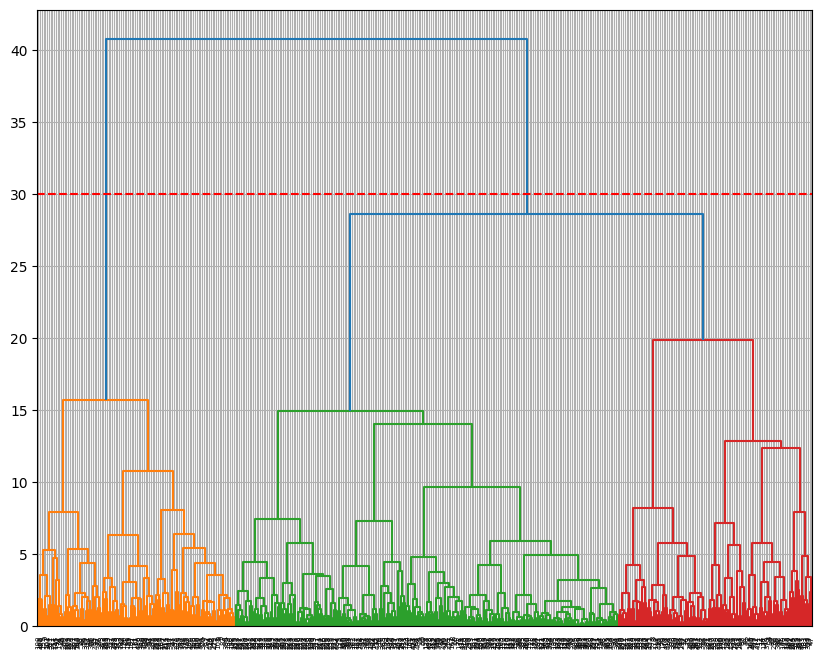

In [216]:
plt.figure(figsize=(10,8))
dendrogram(merging)
plt.axhline(30, color = 'red', linestyle='--')
plt.grid()
plt.show()

In [217]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [218]:
y_hc

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [219]:
# Now for plotting cluster
# We shall plot scatter plots between 'Channel' and 'Fresh','Milk','Grocry','Frozen','Detergents_Paper','Delicassen'
# & between 'Region' and 'Fresh','Milk','Grocry','Frozen','Detergents_Paper','Delicassen'

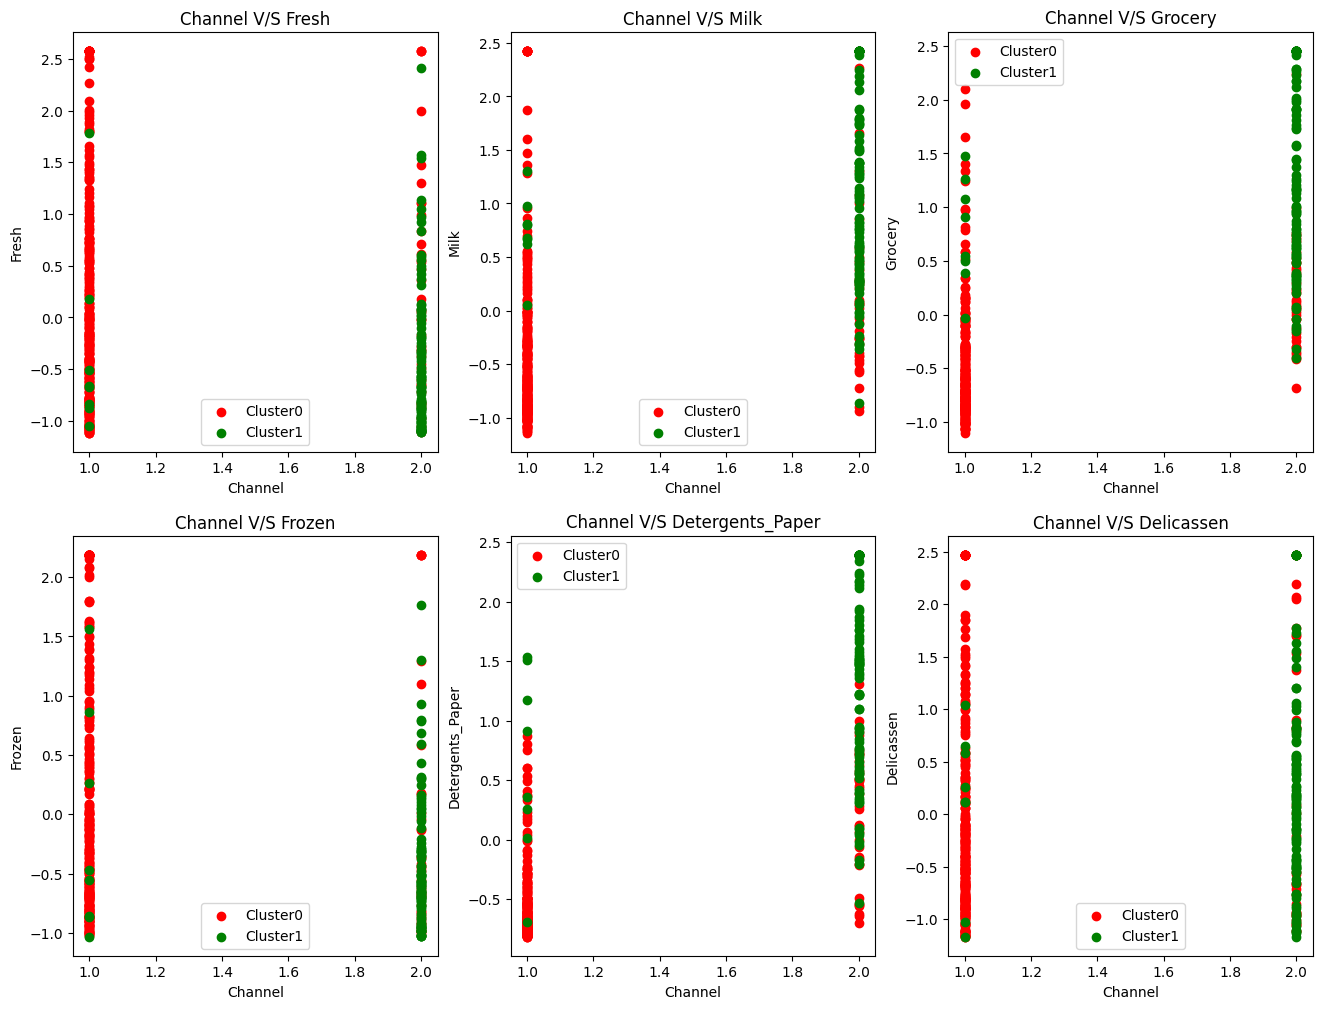

In [220]:
# Channel V/S Fresh
colors = ['r', 'g', 'b']
plt.figure(figsize=(16,12))
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,1)
  plt.scatter(cluster_data['Channel'], cluster_data['Fresh'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Fresh')
plt.title('Channel V/S Fresh')
plt.legend()

# Channel V/S Milk
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,2)
  plt.scatter(cluster_data['Channel'], cluster_data['Milk'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Milk')
plt.title('Channel V/S Milk')
plt.legend()

# Channel V/S Grocery
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,3)
  plt.scatter(cluster_data['Channel'], cluster_data['Grocery'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Grocery')
plt.title('Channel V/S Grocery')
plt.legend()

# Channel V/S Frozen
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,4)
  plt.scatter(cluster_data['Channel'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Frozen')
plt.title('Channel V/S Frozen')
plt.legend()

# Channel V/S Detergents_Paper
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,5)
  plt.scatter(cluster_data['Channel'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Detergents_Paper')
plt.title('Channel V/S Detergents_Paper')
plt.legend()

# Channel V/S Delicassen
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,6)
  plt.scatter(cluster_data['Channel'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Delicassen')
plt.title('Channel V/S Delicassen')
plt.legend()

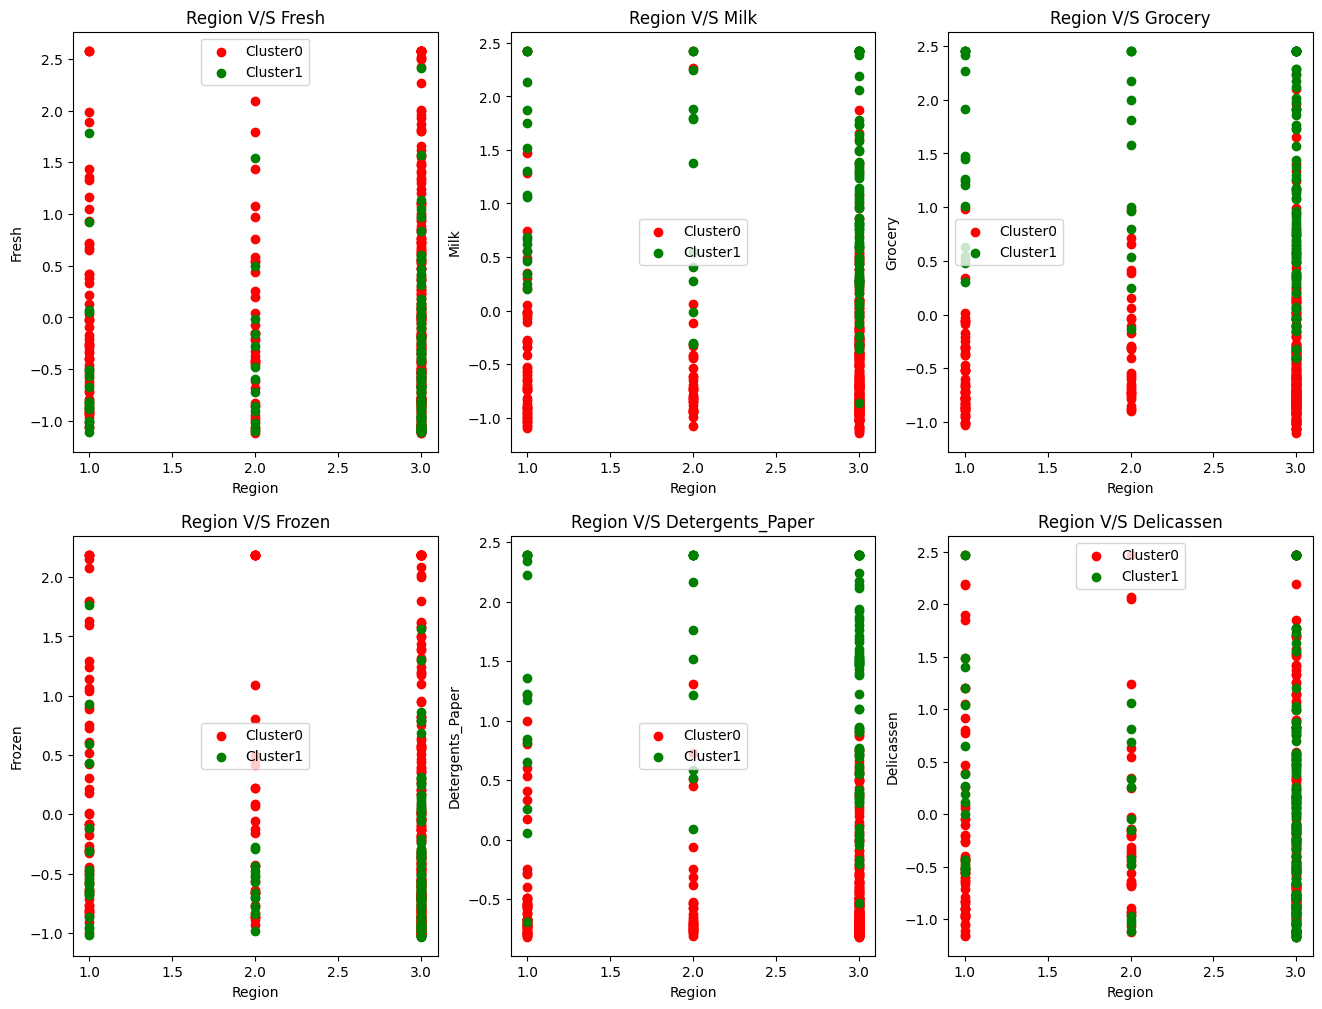

In [221]:
# Now we shall try understanding the relationship b/w region and other features
# Region V/S Fresh
colors = ['r', 'g', 'b']
plt.figure(figsize=(16,12))
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,1)
  plt.scatter(cluster_data['Region'], cluster_data['Fresh'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Fresh')
plt.title('Region V/S Fresh')
plt.legend()

# Region V/S Milk
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,2)
  plt.scatter(cluster_data['Region'], cluster_data['Milk'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Milk')
plt.title('Region V/S Milk')
plt.legend()

# Region V/S Grocery
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,3)
  plt.scatter(cluster_data['Region'], cluster_data['Grocery'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region V/S Grocery')
plt.legend()

# Region V/S Frozen
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,4)
  plt.scatter(cluster_data['Region'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Frozen')
plt.title('Region V/S Frozen')
plt.legend()

# Region V/S Detergents_Paper
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,5)
  plt.scatter(cluster_data['Region'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Detergents_Paper')
plt.title('Region V/S Detergents_Paper')
plt.legend()

# Region V/S Delicassen
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(2,3,6)
  plt.scatter(cluster_data['Region'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Region')
plt.ylabel('Delicassen')
plt.title('Region V/S Delicassen')
plt.legend()

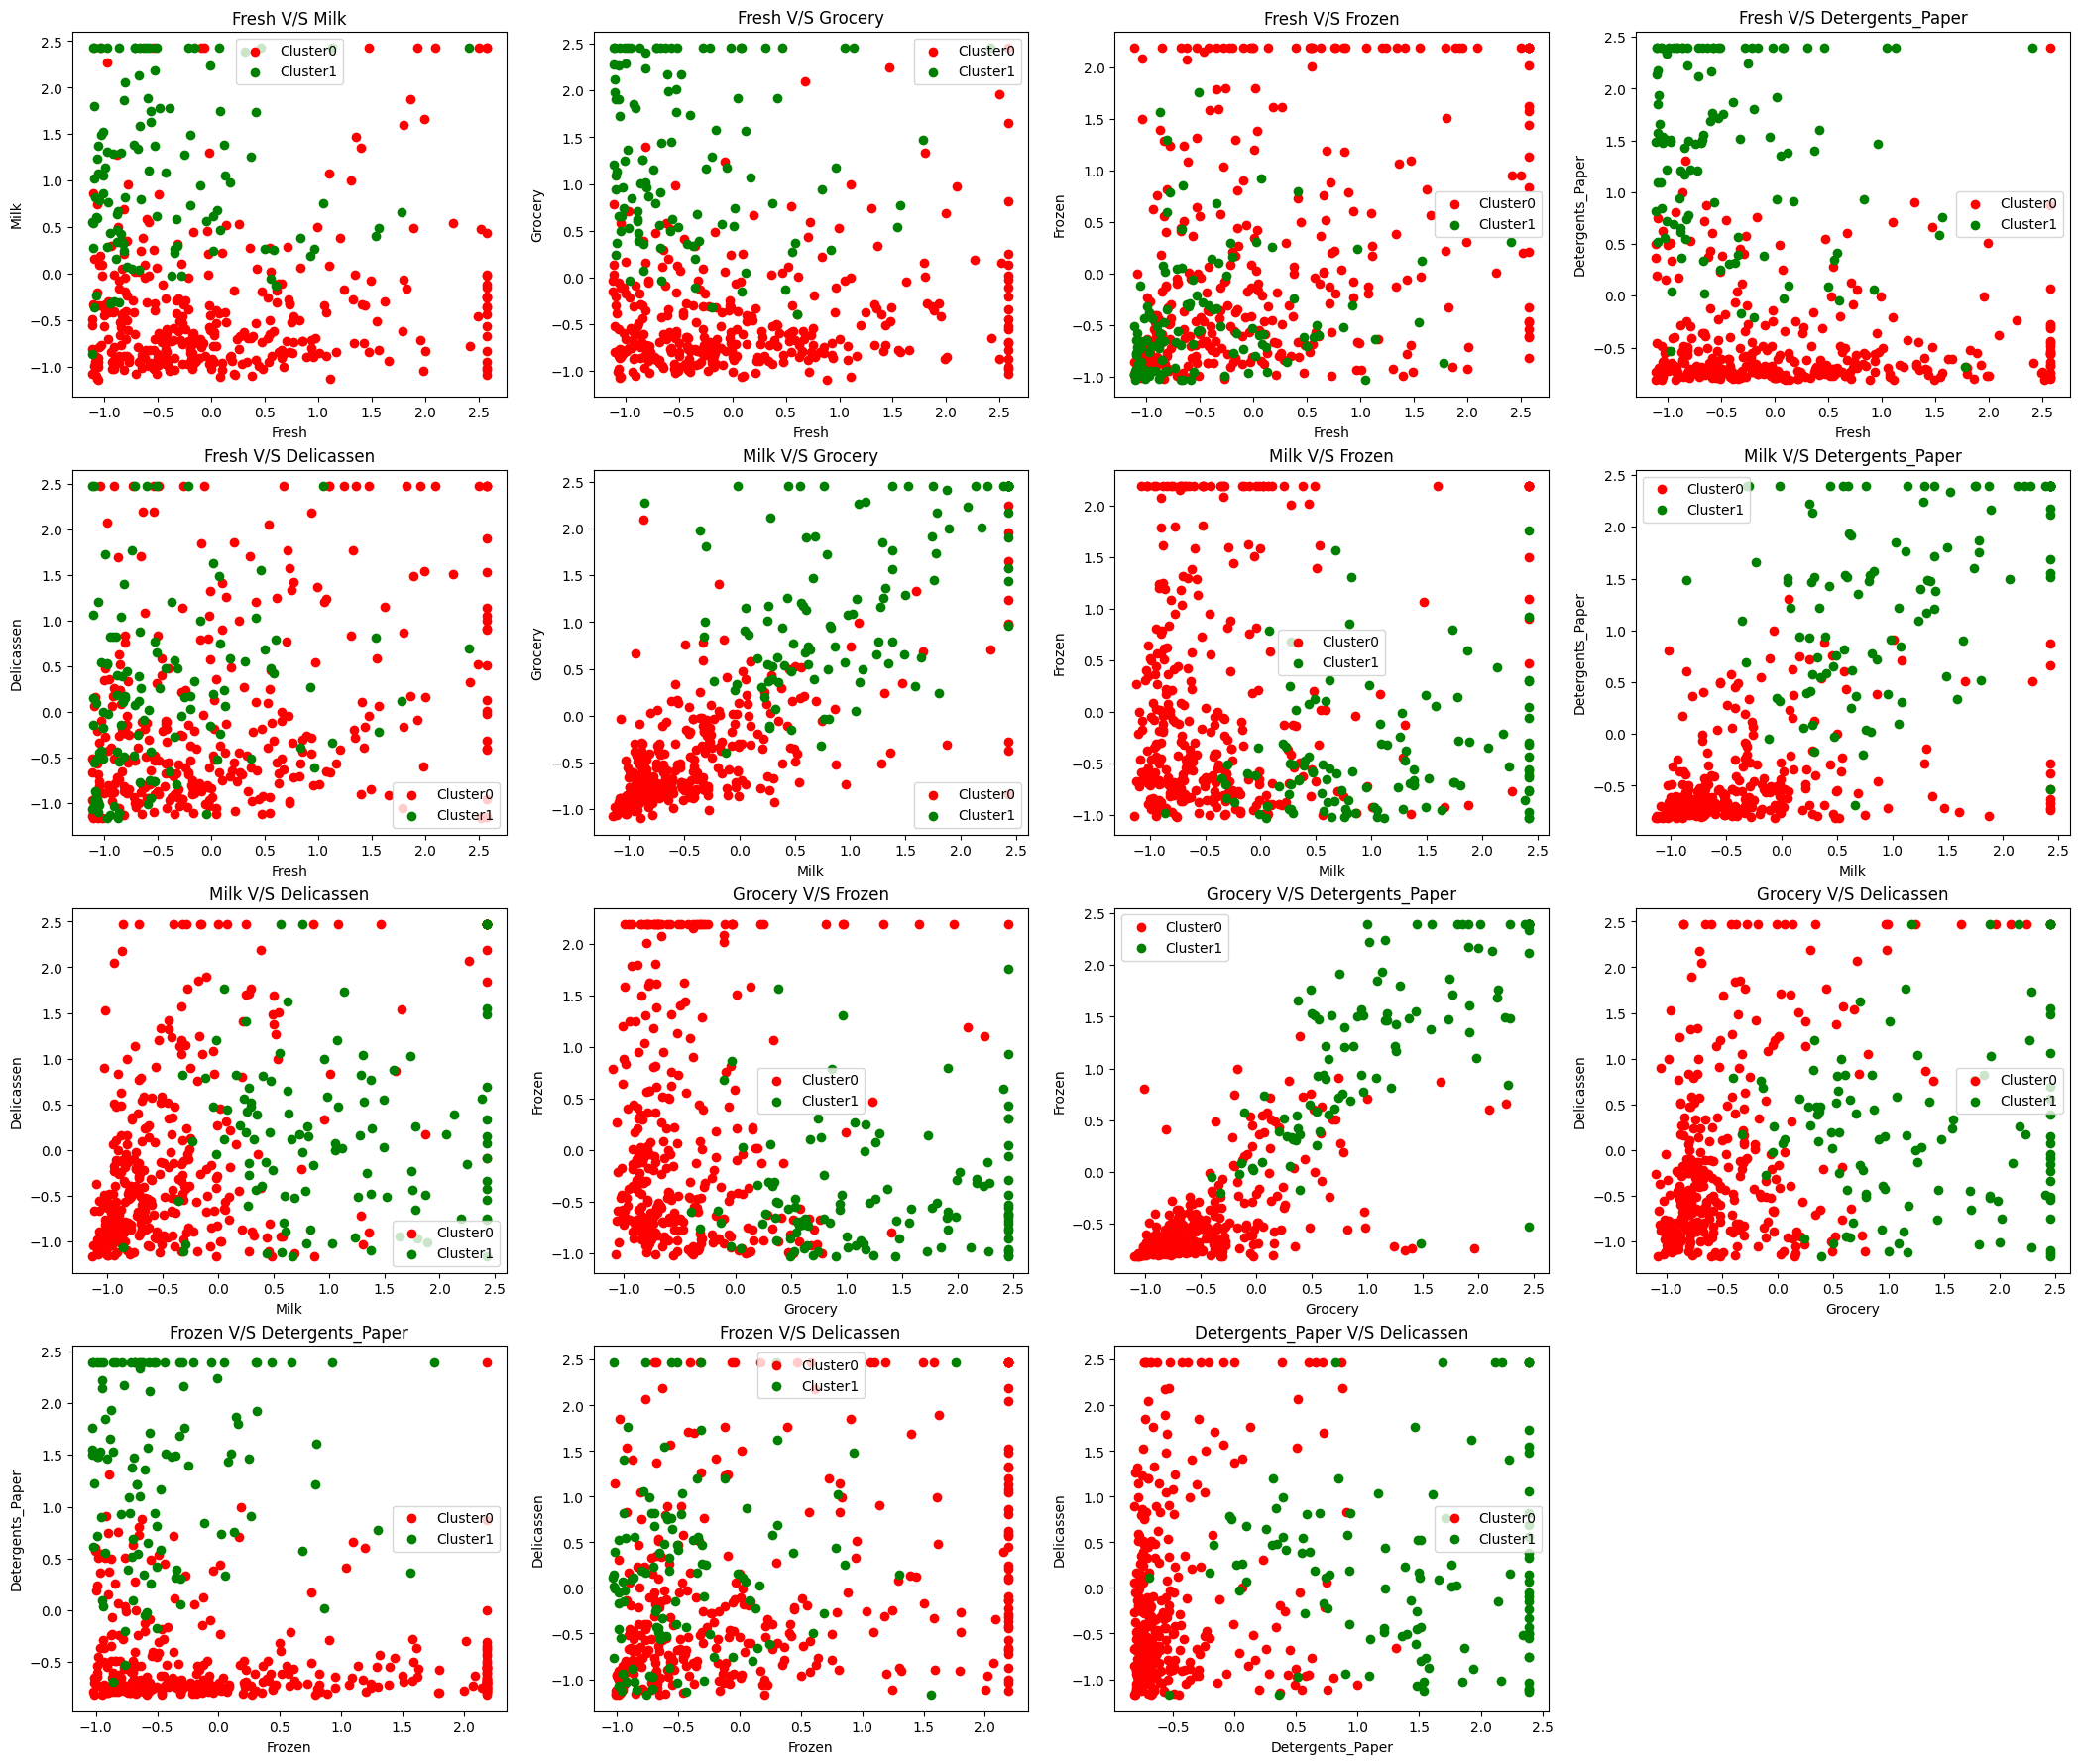

In [222]:
# We will try to understand relation between all other features now
# Fresh V/S Milk
colors = ['r', 'g', 'b']
plt.figure(figsize=(26,22))
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,1)
  plt.scatter(cluster_data['Fresh'], cluster_data['Milk'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Fresh V/S Milk')
plt.legend()

# Fresh V/S Grocery
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,2)
  plt.scatter(cluster_data['Fresh'], cluster_data['Grocery'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Fresh V/S Grocery')
plt.legend()

# Fresh V/S Frozen
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,3)
  plt.scatter(cluster_data['Fresh'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh V/S Frozen')
plt.legend()

# Fresh V/S Detergents_Paper
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,4)
  plt.scatter(cluster_data['Fresh'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.title('Fresh V/S Detergents_Paper')
plt.legend()

# Fresh V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,5)
  plt.scatter(cluster_data['Fresh'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Delicassen')
plt.title('Fresh V/S Delicassen')
plt.legend()

# Milk V/S Grocery
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,6)
  plt.scatter(cluster_data['Milk'], cluster_data['Grocery'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Milk V/S Grocery')
plt.legend()

# Milk V/S Frozen
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,7)
  plt.scatter(cluster_data['Milk'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Frozen')
plt.title('Milk V/S Frozen')
plt.legend()

# Milk V/S Detergents_Paper
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,8)
  plt.scatter(cluster_data['Milk'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')
plt.title('Milk V/S Detergents_Paper')
plt.legend()

# Milk V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,9)
  plt.scatter(cluster_data['Milk'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Delicassen')
plt.title('Milk V/S Delicassen')
plt.legend()

# Grocery V/S Frozen
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,10)
  plt.scatter(cluster_data['Grocery'], cluster_data['Frozen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Grocery V/S Frozen')
plt.legend()

# Grocery V/S Detergents_Paper
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,11)
  plt.scatter(cluster_data['Grocery'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Grocery V/S Detergents_Paper')
plt.legend()

# Grocery V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,12)
  plt.scatter(cluster_data['Grocery'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Grocery')
plt.ylabel('Delicassen')
plt.title('Grocery V/S Delicassen')
plt.legend()

# Frozen V/S Detergents_Paper
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,13)
  plt.scatter(cluster_data['Frozen'], cluster_data['Detergents_Paper'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Frozen')
plt.ylabel('Detergents_Paper')
plt.title('Frozen V/S Detergents_Paper')
plt.legend()

# Frozen V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,14)
  plt.scatter(cluster_data['Frozen'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.title('Frozen V/S Delicassen')
plt.legend()

# Detergents_Paper V/S Delicassen
colors = ['r', 'g', 'b']
for i in range(max(y_hc) + 1):
  cluster_data = x[y_hc==i]
  plt.subplot(4,4,15)
  plt.scatter(cluster_data['Detergents_Paper'], cluster_data['Delicassen'], c=colors[i], label = f'Cluster{i}')
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title('Detergents_Paper V/S Delicassen')
plt.legend()

In [223]:
# Silhouette Score

In [224]:
from sklearn.metrics import accuracy_score,silhouette_score
silhouette = silhouette_score(x,y_hc)
print('Silhouette score is: ', silhouette)


Silhouette score is:  0.2992905443666266


Principal Component Analysis

In [225]:
x.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.171717,0.598616,0.719867,-0.254707,0.790080,0.166639
Region,0.062028,1.000000,0.056523,0.005734,0.005301,-0.050604,0.004717,0.016801
Fresh,-0.171717,0.056523,1.000000,-0.037991,-0.098357,0.355487,-0.226033,0.259404
Milk,0.598616,0.005734,-0.037991,1.000000,0.781205,-0.037049,0.691217,0.372097
Grocery,0.719867,0.005301,-0.098357,0.781205,1.000000,-0.137456,0.877444,0.290121
Frozen,-0.254707,-0.050604,0.355487,-0.037049,-0.137456,1.000000,-0.239435,0.237178
Detergents_Paper,0.790080,0.004717,-0.226033,0.691217,0.877444,-0.239435,1.000000,0.161233
Delicassen,0.166639,0.016801,0.259404,0.372097,0.290121,0.237178,0.161233,1.000000


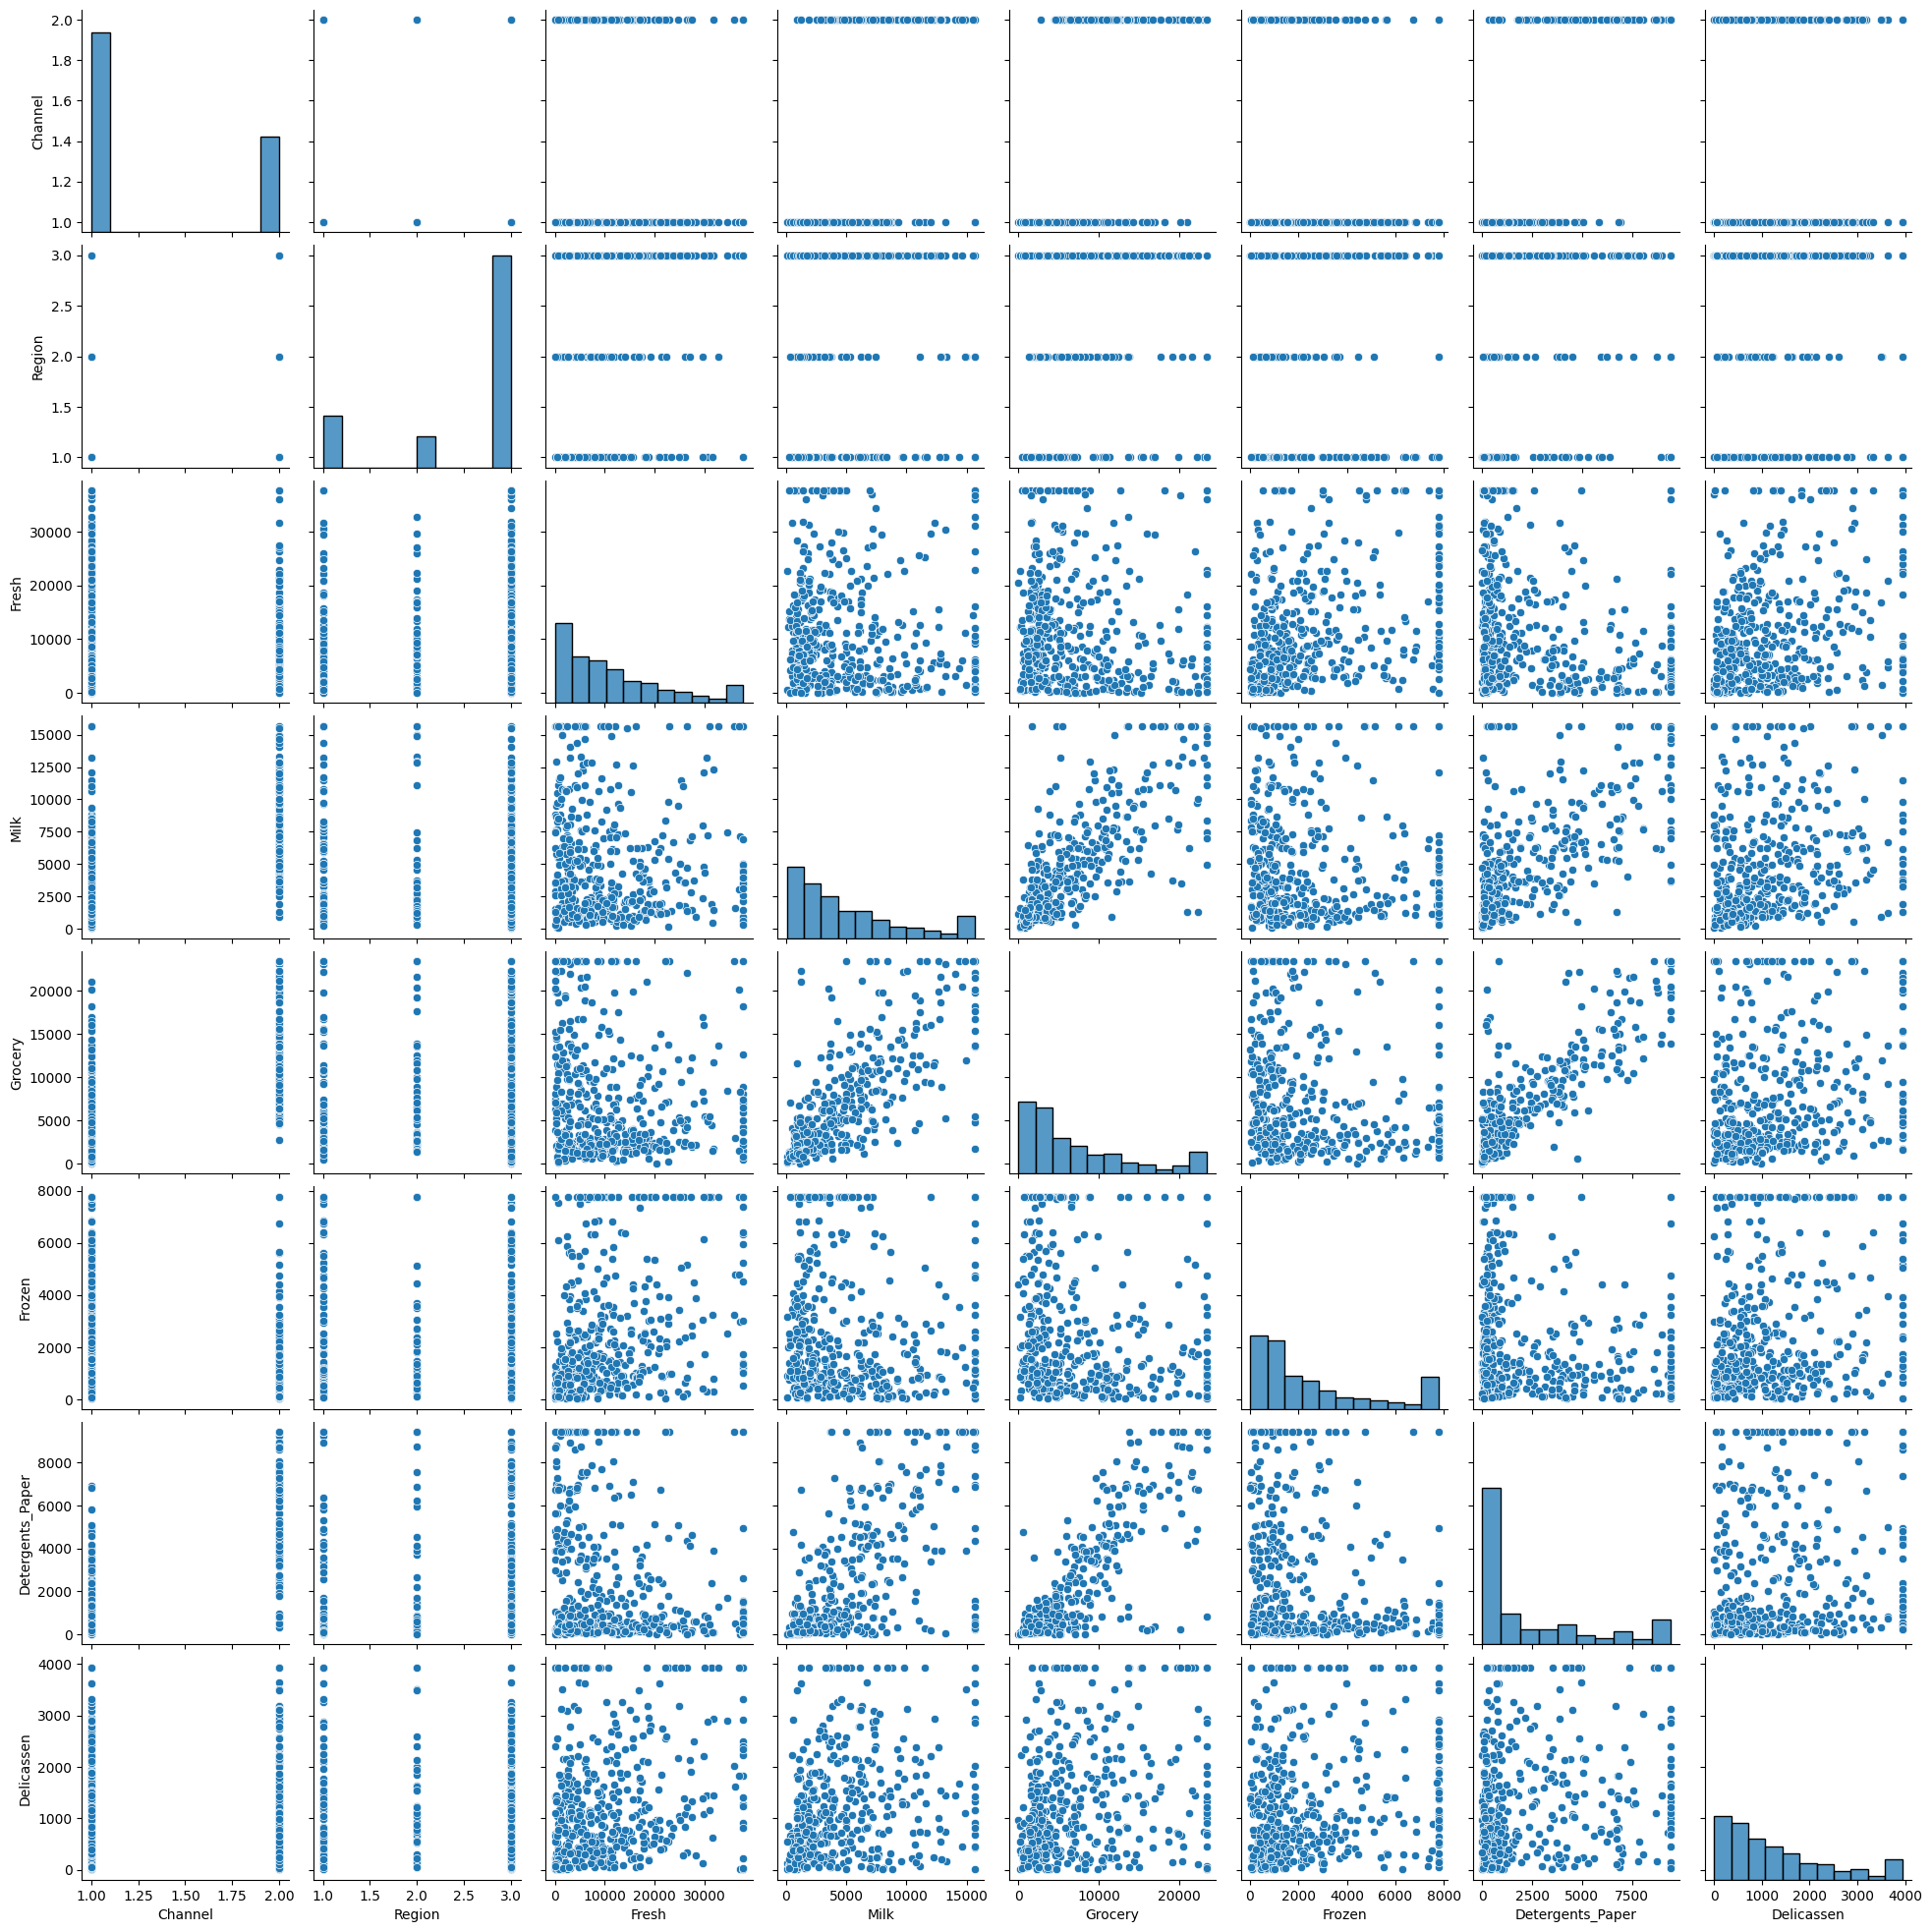

In [226]:
sns.pairplot(data)

In [227]:
data.mean()

Channel                 1.322727
Region                  2.543182
Fresh               11357.568182
Milk                 5048.592045
Grocery              7236.375000
Frozen               2507.085795
Detergents_Paper     2392.616477
Delicassen           1266.715341
dtype: float64

In [228]:
data.var().round()

Channel                     0.0
Region                      1.0
Fresh               104275595.0
Milk                 19240304.0
Grocery              43514249.0
Frozen                5799898.0
Detergents_Paper      8648270.0
Delicassen            1173040.0
dtype: float64

In [229]:
data.dtypes

Channel               int64
Region                int64
Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object

In [230]:
data.shape

(440, 8)

In [231]:
# Since we have already done scaling of data we don't have to do it again

In [232]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,2,3,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,2,3,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,1,3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,2,3,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


In [233]:
# Importing PCA from sklearn.decomposition

In [234]:
from sklearn.decomposition import PCA

In [235]:
pca = PCA()

In [236]:
pc_array = pca.fit_transform(x)
pc_array.shape

(440, 8)

In [237]:
pc_array

array([[ 8.95958126e-01, -3.18044736e-01, -8.88865392e-01, ...,
         7.89859450e-01, -4.33878459e-01,  4.34396791e-01],
       [ 1.26394132e+00, -6.18589905e-02, -2.13280015e-01, ...,
         5.39546446e-01, -3.14285986e-01,  4.14341811e-01],
       [ 1.42875948e+00,  1.06955133e+00, -1.81995581e-01, ...,
         2.64375735e-03, -5.96601967e-01,  2.91097195e-01],
       ...,
       [ 4.25625595e+00,  1.23649101e-01, -8.02067830e-01, ...,
         2.12984300e-01,  8.98828793e-02, -2.73358132e-01],
       [-1.00683922e+00, -1.37600085e-02, -6.95604947e-01, ...,
        -8.33827906e-02,  4.19256906e-02, -7.56033791e-02],
       [-1.23686137e+00, -1.72384506e+00, -3.97705449e-01, ...,
         2.07505807e-01,  1.52237142e-01, -5.46188704e-02]])

In [238]:
pc_array = pd.DataFrame(pc_array, columns=['pc1','pc2','pc3','pc4','pc5','pc6', 'pc7', 'pc8' ])

In [239]:
pc_array.corr().round()  # Representing the new corr b/w the different features

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
pc1,1.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
pc2,-0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0
pc3,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0
pc4,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,-0.0
pc5,-0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,-0.0
pc6,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0
pc7,-0.0,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0
pc8,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0


In [240]:
pca.explained_variance_  # To see the eigenvalues corresponding variance. Each value corresponds to lambda1 variance, lambda2 variance etc etc

array([2.87411832, 1.62400525, 0.68820255, 0.62275969, 0.55984324,
       0.28586542, 0.11017187, 0.06727118])

In [241]:
pca.explained_variance_ratio_*100

array([42.06701401, 23.7697423 , 10.07287211,  9.11501822,  8.19414192,
        4.18406738,  1.61252981,  0.98461424])

In [242]:
42.06701401+23.7697423+10.07287211+9.11501822+8.19414192+4.18406738+1.61252981+0.98461424

99.99999999

In [243]:
# Now we try to reduce the number of features/principal components and only consider the essential ones

In [244]:
# Since sum of variances of the last 2-3 eigenvalues are not that significant, we can remove them from the principal components

In [245]:
pca1 = PCA(n_components = 5)  # Here we remove the last 3 features and try running the algorithm again.

In [246]:
pc_array1 = pca1.fit_transform(x)

In [247]:
pc_array1.shape

(440, 5)

In [248]:
pc_array1 = pd.DataFrame(pc_array1, columns=['pc1','pc2','pc3','pc4','pc5' ])

In [249]:
pc_array1

,pc1,pc2,pc3,pc4,pc5
0,0.895958,-0.318045,-0.888865,0.137198,0.027158
1,1.263941,-0.061859,-0.213280,0.411845,-0.429909
2,1.428759,1.069551,-0.181996,1.997763,-0.494977
3,-1.254206,1.245991,0.552413,0.090055,-0.923673
4,0.407541,2.315818,-0.713203,1.278799,-0.115909
...,...,...,...,...,...
435,0.799890,3.162926,0.156750,-0.952048,-0.559193
436,-1.647973,2.477267,-1.273966,-0.215589,0.322944
437,4.256256,0.123649,-0.802068,-0.576495,0.055547
438,-1.006839,-0.013760,-0.695605,1.199494,-0.125542


In [250]:
pc_array1.corr().round()

,pc1,pc2,pc3,pc4,pc5
pc1,1.0,-0.0,-0.0,0.0,-0.0
pc2,-0.0,1.0,0.0,0.0,-0.0
pc3,-0.0,0.0,1.0,0.0,-0.0
pc4,0.0,0.0,0.0,1.0,0.0
pc5,-0.0,-0.0,-0.0,0.0,1.0


In [251]:
pca1.explained_variance_

array([2.87411832, 1.62400525, 0.68820255, 0.62275969, 0.55984324])

In [252]:
pca1.explained_variance_ratio_*100

array([42.06701401, 23.7697423 , 10.07287211,  9.11501822,  8.19414192])

In [253]:
42.06701401+23.7697423+10.07287211+9.11501822+8.19414192

93.21878856000001

In [254]:
# Therefore we have been able to reduce the number of dimensions from 8 to 5 without a significant change to the variance